Here we will run simple regression models on our dataset.

In [77]:
#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics

#getting transformed data
data = pd.read_csv('transformed_data.csv')
print(data.columns)

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'department_finishing ', 'actual_productivity', 'day', 'quarter_num',
       'department', 'idle_time?', 'idle_men?'],
      dtype='object')


In [78]:
#visualizing the data
def visualize(expected, predicted, title):
    plt.scatter(expected, predicted)
    plt.xlabel("Actual Productivity")
    plt.ylabel("Predicted Productivity")
    plt.title("Actual vs Predicted Productivity" + title)
    plt.show()

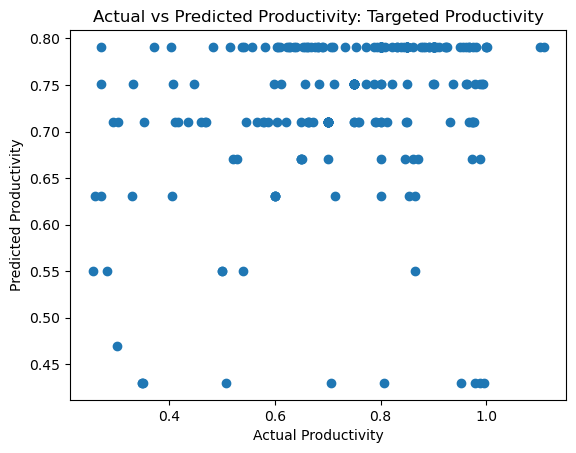

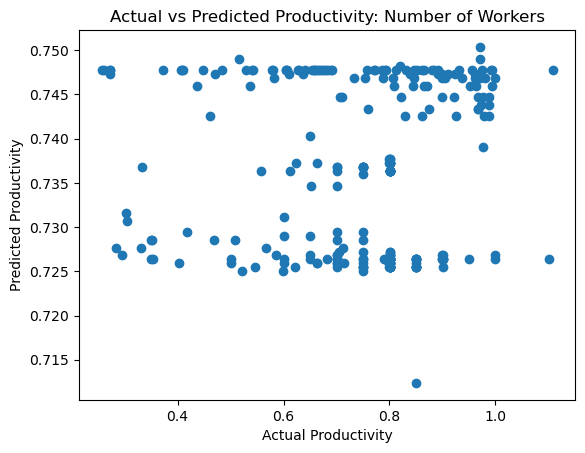

Mean Squared Error: 0.031158681930960275
Mean Absolute Error: 0.13846852168207446
R-squared: 0.0013552936178836683


In [79]:
#single variable linear regression model

X_train, X_test, y_train, y_test = train_test_split(
    data.targeted_productivity.values.reshape(-1, 1), data.actual_productivity.values, random_state=11)

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)
predicted_targeted = linear_regression.predict(X_test)
expected_targeted = y_test
#Using the targeted_productivity column (Note that this data point is a set goal for the quarter not the actual target variable)
visualize(expected_targeted, predicted_targeted, ': Targeted Productivity')

X_train, X_test, y_train, y_test = train_test_split(
    data.no_of_workers.values.reshape(-1, 1), data.actual_productivity.values, random_state=11)
linear_regression.fit(X=X_train, y=y_train)
predicted_workers = linear_regression.predict(X_test)
expected_workers = y_test
#Now running the regression on the number of workers
visualize(expected_workers, predicted_workers, ': Number of Workers')

print('Mean Squared Error:', metrics.mean_squared_error(expected_workers, predicted_workers))
print('Mean Absolute Error:', metrics.mean_absolute_error(expected_workers, predicted_workers))
print('R-squared:', metrics.r2_score(expected_workers, predicted_workers))


Clearly the model is very inaccurate which is expected since we are using just one variable

Mean Squared Error: 0.02523010139976111
Mean Absolute Error: 0.11525809560058341
R-squared: 0.18663785941433797


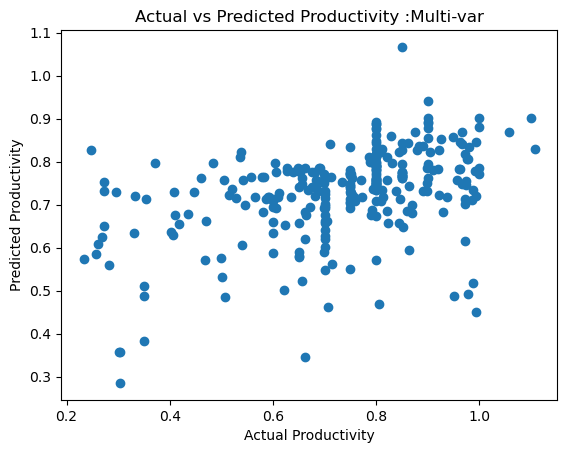

In [80]:
#Multivariate Regression
data = pd.read_csv('transformed_data.csv')
# print(data.columns)

X = data[['team', 'idle_men', 'incentive', 'over_time', 'no_of_workers', 'no_of_style_change', 'wip', 'smv', 'targeted_productivity']] #all integer data points
Y = data[['actual_productivity']] #target value

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3,random_state=11)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R-squared:', metrics.r2_score(y_test, y_pred))

visualize(y_test, y_pred, ' :Multi-var')